In [ ]:
from IPython.display import HTML, display
display(HTML('<style>.CodeMirror{font-family:Verdana}</style>'))

***
## <span style="color:#000066"> Question 15: Boston Dataset </span> 
***

In [ ]:
#### Importing all dependencies from module

In [ ]:
from chapter2_imports import *
from statsmodels.stats.outliers_influence import variance_inflation_factor


### Description
   In this exercise  we will examine the Boston data set. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.
   
   Full descirption of the dataset is here : https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html#:~:text=The%20Boston%20Housing%20Dataset,the%20area%20of%20Boston%20Mass.

### Exploratory Analysis

Before proceeding, let's do a exploratory analysis of the variables involved in the dataset using some statistics and plots 

In [4]:
boston_data = pd.read_csv(r"../data/Boston.csv").dropna(axis=0)
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
boston_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


All variables are quantitative except for CHAS which represents a dummy for Charles River. There are no missing valuesin the dataset. Let's visually check for outlier prence using box plots 

In [6]:
boston_data['chas'] = boston_data['chas'].astype('category')

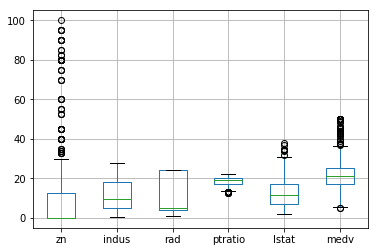

In [7]:
boxplot = boston_data.boxplot(column=['zn', 'indus', 'rad','ptratio', 'lstat', 'medv'])

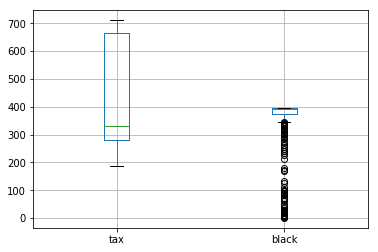

In [8]:
boxplot = boston_data.boxplot(column=['tax', 'black'])

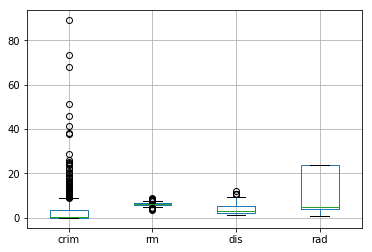

In [9]:
boxplot = boston_data.boxplot(column=['crim', 'rm', 'dis', 'rad'])

In this dataset, we find that response variable CRIM and independents 'black', 'rm', 'dis', 'zn', 'ptratio','lstat' and 'medv' are all exhibiting outliers. Outliers in general are regarded as data distortions but some shed valuable information. For example, in case of a cross section dataset, an entire row of variables maybe be outlier representing a shock or particular characteristic feature of the response. Exclusion of such outliers may make out model lose valuable insights. In such case, it is imperative to treat the outliers thorugh transformations rather than complete exclusion. 
In general, data modelers use the following techniques to handle outliers 
- Flooring and capping using quantiles
- Trimming - setting a high and low level ( an breach in any particular variable will cause exclusion of the entire row)
- IQR based Trimming (Q+/-1.5IQR) 
- Log tranformations - Squre root and other Box Cox tranformations 
- Replacement using Median


Let's do a log tranformation of response varaible to CRIM to see minimize the impact of outliers and reduce the skeness the log transformation reduces or removes the skewness of our original data.

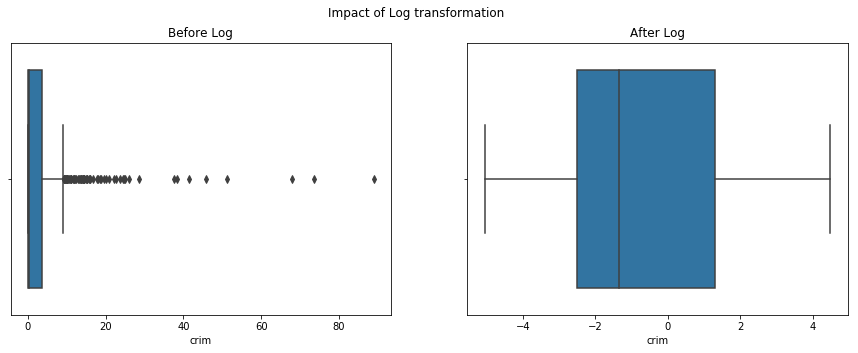

In [10]:
fig, axes = plt.subplots(1,2, figsize=(15, 5), sharey=True)
fig.suptitle('Impact of Log transformation')
axes[0].set_title('Before Log')
axes[1].set_title('After Log')
sns.boxplot(boston_data['crim'],ax=axes[0]),
sns.boxplot(np.log(boston_data['crim']), ax=axes[1])

So we can see that the skewness came down. Thu without dropping the rows that exhibited outliers for CRIM, we were able to successfully tranform it and made it ready for modelling 

Variables such as ptratio, lstat, rm and dis have very few outliers points in comparison to the total number of data points available. Users may drop those rows and see how there regression coefficients are gretting affected. If the coefficients are stable, they may be left untreated  depeneding on the application of the problem statement

In [11]:
boston_data['crim'] = np.log(boston_data['crim'])

Lets now proceeed with a simple OLS regression and evaluate the summary results. Here we will be constructing simple OLS of each indepenednet varaible against crim and see which are all statistically significant

In [12]:
model_dict = {}
cols = list(boston_data.columns)
cols.remove('crim')
cols.remove('chas')
for var in cols:
    model_dict[var+'_model'] = sm.OLS(boston_data['crim'],sm.add_constant(boston_data[var])).fit()
    print(model_dict[var+'_model'].summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     183.9
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           6.07e-36
Time:                        18:21:12   Log-Likelihood:                -1028.9
No. Observations:                 506   AIC:                             2062.
Df Residuals:                     504   BIC:                             2070.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2357      0.092     -2.573      0.0

In [13]:
pvalues_df = pd.DataFrame(columns=['p-value'])
for var in cols:
    pvalues_df.loc[var,'p-value'] = model_dict[var+'_model'].pvalues[var]
pvalues_df

,p-value
zn,6.07489e-36
indus,1.24666e-85
nox,1.60594e-108
rm,1.68276e-12
age,3.70505e-64
dis,1.83066e-70
rad,1.0192e-144
tax,7.38546e-129
ptratio,8.77039e-20
black,2.37651e-30


As we can see above all the p-values are less tha 0.05. Hence at a 5% significance level, we can reject the null hypothesis in each case and say each of these variables are statistically significant in their simple linear model state

Let's now fit a multiple regression model and ee how the results are varying

In [15]:
model_15_A = smf.ols('crim ~ C(chas)+zn+indus+nox+rm+age+dis+rad+tax+ptratio+black+lstat+medv', data=boston_data).fit() 
model_15_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     265.9
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          8.12e-213
Time:                        18:21:32   Log-Likelihood:                -580.74
No. Observations:                 506   AIC:                             1189.
Df Residuals:                     492   BIC:                             1249.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.7329      0.869     -4.297      0.000      -5.440      -2.026
C(chas)[T.1]    -0.0481      0.142     -0.339      0.734      -0.327       0.230
zn              -0.0117      0.002     -5.194      0.000      -0.016      -0.007
indus            0.0198      0.010      1.973      0.049    7.74e-05       0.039
nox              3.8468      0.633      6.072      0.000       2.602       5.091
rm              -0.0490      0.074     -0.666      0.506      -0.194       0.096
age              0.0060      0.002      2.782      0.006       0.002       0.010
dis             -0.0054      0.034     -0.161      0.872      -0.072       0.061
rad              0.1429      0.011     13.511      0.000       0.122       0.164
tax             -0.0001      0.001     -0.213      0.831      -0.001       0.001
ptratio         -0.0411      0.022     -1.837      0.067      -0.085       0.003
black           -0.0015      0.000     -3.404      0.001      -0.002      -0.001
lstat            0.0317      0.009      3.487      0.001       0.014       0.050
medv             0.0105      0.007      1.441      0.150      -0.004       0.025
==============================================================================
Omnibus:                        7.824   Durbin-Watson:                   0.647
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.833
Skew:                           0.304   Prob(JB):                       0.0199
Kurtosis:                       3.050   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we find that not all variable are significant. Why is it so? This is an indication of possible presence of multicollinearity. Individually these variable might have been significant, but when we construct a multiple linear regression, the variation contributed by them is already captured by other variables which are collinear to it. We can conduct a VIF test to see collinearity in the dataset

In [16]:
X = sm.add_constant(boston_data.drop(columns=['crim', 'chas']))
vifs = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(data=vifs, index=X.columns).sort_values(ascending=False)

const      638.520713
tax          9.108068
rad          7.122993
nox          4.532995
dis          4.284044
indus        3.947090
medv         3.693492
lstat        3.561435
age          3.093091
zn           2.324877
rm           2.256668
ptratio      1.980832
black        1.368383
dtype: float64

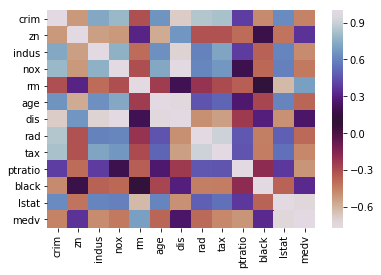

In [17]:
sns.heatmap(boston_data.corr(), cmap = 'twilight_r')

So here we see both tax and rad are having high VIF indicating multicollinear effect. Also above correlation plot indicates, tax and rad have more than 90% correlation. We can remove one of the variable

A comparison of p-values from both models (simple OLS vs multiple OLS)

In [18]:
multi_df = pd.DataFrame(model_15_A.pvalues, columns = ['multi_pvalues'])
multi_df = multi_df[1:]
merged_df = pvalues_df.join(multi_df, how = 'outer')
merged_df

,p-value,multi_pvalues
C(chas)[T.1],NaN,7.344768e-01
age,3.70505e-64,5.608199e-03
black,2.37651e-30,7.181334e-04
dis,1.83066e-70,8.724091e-01
indus,1.24666e-85,4.910868e-02
lstat,1.51175e-56,5.327812e-04
medv,3.89839e-27,1.502986e-01
nox,1.60594e-108,2.521200e-09
ptratio,8.77039e-20,6.675491e-02
rad,1.0192e-144,1.323083e-35


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=merged_df['p-value'], y=merged_df['multi_pvalues'], mode= "markers", 
                         marker= {
                                    "size": 5, 
                                    "color": "rgb(214, 39, 40)", 
                                    "symbol": "diamond", 
                                  },
                          name="Scatter"))
fig.update_layout(template='plotly_white', showlegend=True)
fig.show()

Checking for non linear associations : Y = $β_0$ + $β_1$ X + $β_2$ $X^2$ + $β_3$ $X^3$ + e

In [19]:
model_dict_nonlinear = {}
cols = list(boston_data.columns)
cols.remove('crim')
for var in cols:
    model_dict_nonlinear[var+'_model'] = smf.ols(formula=('crim ~ {0} + np.power({0}, 2) +  np.power({0}, 3)').format(var), data=boston_data).fit()
    print(model_dict_nonlinear[var+'_model'].summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     70.53
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           4.50e-38
Time:                        18:21:46   Log-Likelihood:                -1018.7
No. Observations:                 506   AIC:                             2045.
Df Residuals:                     502   BIC:                             2062.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1109      0.094     

PatsyError: Error evaluating factor: TypeError: Series with dtype category cannot perform the numpy op power
    crim ~ chas + np.power(chas, 2) +  np.power(chas, 3)
                  ^^^^^^^^^^^^^^^^^